# Sentiment Analysis of Yelp Reviews - Modeling

### Contents

 - Introduction
 - Part 1: Machine Learning with Extracted Features 
       - Logistic Regression
       - Random Forest
       - Support Vector Classification
       - Results
        
- Part 2: Machine Learning with Bag of Words
       - Naive Bayes with CountVectorizer
       - Naive Bayes with TFIDF
       - Results
- Part 3: Embedding Techniques
       - Dense + Sparse Features
       - Naive Bayes Probability with Dense + Sparse Features
       - Stacked Model
       - Results
- Conclusion

### Introduction

We've collected the data, analyzed it, found the most important feautres, and have a baseline accuracy around 50%. Now we'll be going through some other methods of modeling to find the most accurate version.

In this notebook we will:

- Test out multiple different models
- Including Regular ML Models with our extracted features and embedded models with sparse/dense text matrices

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

yelp_data = pd.read_csv('https://raw.githubusercontent.com/rabin1323/DataScience_Final_Project/main/yelp_data_sentiment.csv')

In [2]:
yelp_data.head()

,business_id,text,Polarity,Sentiment,Positive_Words_P,went,first,time,bread,would,...,super,return,quick,reason,steak,must,hous,dine,care,realli good
0,dPxZI9lrKTl5dvFfnb1_Ig,Went in for the first time tonight and within ...,0.404286,Positive,0.242105,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.126339,0.000000,0.0,0.000000,0.104748,0.0,0.0
1,dPxZI9lrKTl5dvFfnb1_Ig,Hands down this is Las Vegas best mom and pop ...,0.116429,Slightly Negative,0.132075,0.0,0.0,0.0,0.0,0.179843,...,0.0,0.0,0.167635,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0
2,dPxZI9lrKTl5dvFfnb1_Ig,The BEST & REAL ITALIAN Food in Las Vegas! So ...,0.450000,Positive,0.125000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0
3,dPxZI9lrKTl5dvFfnb1_Ig,Excellent family-run Italian restaurant. Off-s...,0.179167,Slightly Negative,0.210526,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.206105,0.000000,0.000000,0.0,0.237339,0.000000,0.0,0.0
4,dPxZI9lrKTl5dvFfnb1_Ig,We went here to celebrate a birthday. The atmo...,0.617143,Positive,0.500000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.271624,0.348561,0.0,0.000000,0.000000,0.0,0.0


## Part 1: Machine Learning with Extracted Features
There are many different models we can try but to start we're going to work with the standard machine learning models like logistic regression and random forest

I'll be collecting accuracy and f1 scores along the way to see which model performs the best with this data!

Here's what the process will look like:

- Choose a model type
- Define a pipeline and use GridSearch to find the best parameters
- Save the model so we don't have the run the cell multiple times
- Load the model and run accuracy and f1 scores
- Move on to the next model



In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import pickle
from pycm import *

X = yelp_data.iloc[0:,4:]
y = yelp_data.Sentiment
indices = yelp_data.index

X_train, X_test, y_train, y_test, itrain, itest = train_test_split(X,y,indices,train_size=0.8,random_state=7)

## Logistic Regression
For this model we're going to create a pipeline that uses the standard scaler and a classifier using GridSearch to find the best parameters

In [4]:
steps = [('scaler', StandardScaler()), ('lr', LogisticRegression(solver = 'lbfgs'))] 
pipeline = Pipeline(steps)
parameters = {'lr__C':[0.01, 0.1, 1, 10, 100]}

clf = GridSearchCV(pipeline, parameters, cv = 10, scoring="accuracy") 
clf.fit(X_train, y_train)
clf.best_params_

{'lr__C': 0.1}

In [5]:
filename = 'lr.sav'
pickle.dump(clf, open(filename, 'wb'))

In [6]:
filename = 'lr.sav'
clf = pickle.load(open(filename, 'rb'))

In [7]:
results = clf.predict(X_test)

In [8]:
test_accuracy = clf.score(X_test, y_test)
f1_accuracy = f1_score(y_test,results,average='macro')
f1_accuracym = f1_score(y_test,results,average='micro')
f1_accuracyw = f1_score(y_test,results,average='weighted')
print("Accuracy on test data: " ,test_accuracy)
print('F1 Score (macro): ', f1_accuracy)
print('F1 Score (micro): ', f1_accuracym)
print('F1 Score (weighted): ', f1_accuracyw)

Accuracy on test data:  0.5841784989858012
F1 Score (macro):  0.566725460237571
F1 Score (micro):  0.5841784989858012
F1 Score (weighted):  0.5821563361924262


In [9]:
lr_acc = test_accuracy
lr_f1 = f1_accuracy
lr_f1m = f1_accuracym
lr_f1w = f1_accuracyw

## Random Forest

Same thing here, first we'll make a pipeline and then use gridsearch to find the best parameters to tune this model

In [10]:
from sklearn.ensemble import RandomForestClassifier

In [11]:
steps = [('scaler', StandardScaler()), ('rf', RandomForestClassifier())] 
pipeline = Pipeline(steps) 
parameters = {'rf__n_estimators':[10 , 20, 30, 40, 50], 'rf__max_features':['auto','sqrt']}
clf = GridSearchCV(pipeline, parameters, cv = 10, scoring="accuracy") 
clf.fit(X_train, y_train)

clf.best_params_

{'rf__max_features': 'sqrt', 'rf__n_estimators': 40}

In [12]:
filename = 'rf.sav'
pickle.dump(clf, open(filename, 'wb'))

In [13]:
filename = 'rf.sav'
clf = pickle.load(open(filename, 'rb'))

In [14]:
results = clf.predict(X_test)

In [15]:
test_accuracy = clf.score(X_test, y_test)
f1_accuracy = f1_score(y_test,results,average='macro')
f1_accuracym = f1_score(y_test,results,average='micro')
f1_accuracyw = f1_score(y_test,results,average='weighted')
print("Accuracy on test data: " ,test_accuracy)
print('F1 Score (macro): ', f1_accuracy)
print('F1 Score (micro): ', f1_accuracym)
print('F1 Score (weighted): ', f1_accuracyw)

Accuracy on test data:  0.5578093306288032
F1 Score (macro):  0.5340313270771145
F1 Score (micro):  0.5578093306288032
F1 Score (weighted):  0.552939080661081


In [16]:
rf_acc = test_accuracy
rf_f1 = f1_accuracy
rf_f1m = f1_accuracym
rf_f1w = f1_accuracyw

## Support Vector Classification (SVC)

For the SVC model I will unfortunately have to set the kernel to 'linear' and the gamma to 'auto'.

In [17]:
from sklearn.svm import SVC

steps = [('scaler', StandardScaler()), ('svc', SVC(probability=False,kernel='linear',gamma='auto'))] 
pipeline = Pipeline(steps) 
parameters = {'svc__C':[0.01, 0.1, 1]}

clf = GridSearchCV(pipeline, parameters, cv = 3, scoring="accuracy") 
clf.fit(X_train, y_train)

clf.best_params_

{'svc__C': 0.01}

In [18]:
filename = 'svc.sav'
pickle.dump(clf, open(filename, 'wb'))

In [19]:
filename = 'svc.sav'
clf = pickle.load(open(filename, 'rb'))

In [20]:
results = clf.predict(X_test)

In [21]:
test_accuracy = clf.score(X_test, y_test)
f1_accuracy = f1_score(y_test,results,average='macro')
f1_accuracym = f1_score(y_test,results,average='micro')
f1_accuracyw = f1_score(y_test,results,average='weighted')
print("Accuracy on test data: " ,test_accuracy)
print('F1 Score (macro): ', f1_accuracy)
print('F1 Score (micro): ', f1_accuracym)
print('F1 Score (weighted): ', f1_accuracyw)

Accuracy on test data:  0.5983772819472617
F1 Score (macro):  0.5817718479006232
F1 Score (micro):  0.5983772819472617
F1 Score (weighted):  0.5957082762355302


In [22]:
svc_acc = test_accuracy
svc_f1 = f1_accuracy
svc_f1m = f1_accuracym
svc_f1w = f1_accuracyw

## Results

Now we have all our scores, let's see which model performed the best

In [23]:
result1 = pd.DataFrame({'Model':['Logistic Regression', 'Random Forest', 'SVC'],
             'Accuracy':[lr_acc, rf_acc, svc_acc],
             'F1_Macro':[lr_f1, rf_f1, svc_f1],
             'F1_Micro':[lr_f1m, rf_f1m, svc_f1m],
             'F1_Weighted':[lr_f1w, rf_f1w, svc_f1w]})
result1 = result1.round(3)
result1

,Model,Accuracy,F1_Macro,F1_Micro,F1_Weighted
0,Logistic Regression,0.584,0.567,0.584,0.582
1,Random Forest,0.558,0.534,0.558,0.553
2,SVC,0.598,0.582,0.598,0.596


## Part 2: Machine Learning Models with Bag of Words

This time around we'll be working backwards, we've already done feature selection for our text, but with these methods we should be able to construct a dense/sparse text matrix and make an independent prediction based on just the text

The goal here is to find a purely text based model to generate a prediction, then to assign that prediciton to a new feature. This should significantly improve performance

In [24]:
# new pure text based dataset

X = yelp_data.text
y = yelp_data.Sentiment
indices = yelp_data.index

In [25]:
# same split, size and random state
X_train, X_test, y_train, y_test, i_train, i_test = train_test_split(X, y, indices, train_size = 0.8, random_state = 7)

## Naive Bayes with CountVectorizer

Now we're going to test two classification methods with two different text vectorizers to get the best result, first we'll do Naive Bayes with CV and TFIDF

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

steps = [('vec', CountVectorizer(stop_words = 'english', ngram_range = (1, 2))), ('nb', MultinomialNB())] 
pipeline = Pipeline(steps) 
parameters = {'vec__min_df':[0.01, 0.1, 1, 10, 100], 'nb__alpha':[0.01, 0.1, 1, 10, 100]}

clf = GridSearchCV(pipeline, parameters, cv = 10, scoring="accuracy") 
clf.fit(X_train, y_train)

clf.best_params_

{'nb__alpha': 1, 'vec__min_df': 10}

In [27]:
filename = 'nb_cv.sav'
pickle.dump(clf, open(filename, 'wb'))

In [28]:
filename = 'nb_cv.sav'
clf = pickle.load(open(filename, 'rb'))

In [29]:
results = clf.predict(X_test)

In [30]:
test_accuracy = clf.score(X_test, y_test)
probs = clf.predict_proba(X_test)[:, 1]
f1_accuracy = f1_score(y_test,results,average='macro')
f1_accuracym = f1_score(y_test,results,average='micro')
f1_accuracyw = f1_score(y_test,results,average='weighted')
print("Accuracy on test data: " ,test_accuracy)
print('F1 Score (macro): ', f1_accuracy)
print('F1 Score (micro): ', f1_accuracym)
print('F1 Score (weighted): ', f1_accuracyw)

Accuracy on test data:  0.5760649087221096
F1 Score (macro):  0.5769270552976098
F1 Score (micro):  0.5760649087221096
F1 Score (weighted):  0.5747336831296701


In [31]:
nb_cv_acc = test_accuracy
nb_cv_f1 = f1_accuracy
nb_cv_f1m = f1_accuracym
nb_cv_f1w = f1_accuracyw

## Naive Bayes with TFIDF

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

steps = [('vec', TfidfVectorizer(stop_words = 'english', ngram_range = (1, 2))), ('nb', MultinomialNB())] 
pipeline = Pipeline(steps) 
parameters = {'vec__min_df':[0.01, 0.1, 1, 10, 100], 'nb__alpha':[0.01, 0.1, 1, 10, 100]}

clf = GridSearchCV(pipeline, parameters, cv = 10, scoring="accuracy") 
clf.fit(X_train, y_train)

clf.best_params_

{'nb__alpha': 0.1, 'vec__min_df': 10}

In [33]:
filename = 'nb_tf.sav'
pickle.dump(clf, open(filename, 'wb'))

In [34]:
filename = 'nb_tf.sav'
clf = pickle.load(open(filename, 'rb'))

In [35]:
filename = 'nb_tf.sav'
clf = pickle.load(open(filename, 'rb'))

In [36]:
test_accuracy = clf.score(X_test, y_test)
probs = clf.predict_proba(X_test)[:, 1]
f1_accuracy = f1_score(y_test,results,average='macro')
f1_accuracym = f1_score(y_test,results,average='micro')
f1_accuracyw = f1_score(y_test,results,average='weighted')
print("Accuracy on test data: " ,test_accuracy)
print('F1 Score (macro): ', f1_accuracy)
print('F1 Score (micro): ', f1_accuracym)
print('F1 Score (weighted): ', f1_accuracyw)

Accuracy on test data:  0.5273833671399595
F1 Score (macro):  0.5769270552976098
F1 Score (micro):  0.5760649087221096
F1 Score (weighted):  0.5747336831296701


In [37]:
nb_tf_acc = test_accuracy
nb_tf_f1 = f1_accuracy
nb_tf_f1m = f1_accuracym
nb_tf_f1w = f1_accuracyw

## Results

In [38]:
result2 = pd.DataFrame({'Model':['NB_CV', 'NB_TF'],
             'Accuracy':[nb_cv_acc, nb_tf_acc],
             'F1_Macro':[nb_cv_f1, nb_tf_f1],
             'F1_Micro':[nb_cv_f1m, nb_tf_f1m],
             'F1_Weighted':[nb_cv_f1w, nb_tf_f1w]})
result2 = result2.round(3)
result2

,Model,Accuracy,F1_Macro,F1_Micro,F1_Weighted
0,NB_CV,0.576,0.577,0.576,0.575
1,NB_TF,0.527,0.577,0.576,0.575


In this case, the Naive Bayes countVectorizer is the best choice.

## Part 3: Embedding Techniques
This next step is going to calculate the sparse/dense matrix of all the review's text.

Once we have that probability we can add it as a feature to the GBC model and have a stacked model and see if we get any improved accuracy

### Dense + Sparse Features

In [39]:
df_combined = yelp_data
df_combined['Review'] = yelp_data['text']
vec = TfidfVectorizer(stop_words = 'english', ngram_range = (1, 2))
vec_fit = vec.fit(df_combined.Review)
sf = vec.fit_transform(df_combined.Review)
sf

<2464x88960 sparse matrix of type '<class 'numpy.float64'>'
	with 193587 stored elements in Compressed Sparse Row format>

In [40]:
df_combined

,business_id,text,Polarity,Sentiment,Positive_Words_P,went,first,time,bread,would,...,return,quick,reason,steak,must,hous,dine,care,realli good,Review
0,dPxZI9lrKTl5dvFfnb1_Ig,Went in for the first time tonight and within ...,0.404286,Positive,0.242105,0.000000,0.0,0.0,0.00000,0.000000,...,0.0,0.000000,0.126339,0.000000,0.0,0.000000,0.104748,0.0,0.0,Went in for the first time tonight and within ...
1,dPxZI9lrKTl5dvFfnb1_Ig,Hands down this is Las Vegas best mom and pop ...,0.116429,Slightly Negative,0.132075,0.000000,0.0,0.0,0.00000,0.179843,...,0.0,0.167635,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,Hands down this is Las Vegas best mom and pop ...
2,dPxZI9lrKTl5dvFfnb1_Ig,The BEST & REAL ITALIAN Food in Las Vegas! So ...,0.450000,Positive,0.125000,0.000000,0.0,0.0,0.00000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,The BEST & REAL ITALIAN Food in Las Vegas! So ...
3,dPxZI9lrKTl5dvFfnb1_Ig,Excellent family-run Italian restaurant. Off-s...,0.179167,Slightly Negative,0.210526,0.000000,0.0,0.0,0.00000,0.000000,...,0.0,0.206105,0.000000,0.000000,0.0,0.237339,0.000000,0.0,0.0,Excellent family-run Italian restaurant. Off-s...
4,dPxZI9lrKTl5dvFfnb1_Ig,We went here to celebrate a birthday. The atmo...,0.617143,Positive,0.500000,0.000000,0.0,0.0,0.00000,0.000000,...,0.0,0.000000,0.271624,0.348561,0.0,0.000000,0.000000,0.0,0.0,We went here to celebrate a birthday. The atmo...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2459,UcIrRf2mWgqqlg-HNoDl0A,This place was pretty good. I really liked the...,0.221875,Slightly Positive,0.163265,0.000000,0.0,0.0,0.13434,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,This place was pretty good. I really liked the...
2460,UcIrRf2mWgqqlg-HNoDl0A,We've been here more than a handful of times a...,0.308333,Slightly Positive,0.272727,0.000000,0.0,0.0,0.00000,0.376120,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,We've been here more than a handful of times a...
2461,UcIrRf2mWgqqlg-HNoDl0A,We can order and pick up in 10 minutes or less...,-0.216667,Negative,0.076923,0.229598,0.0,0.0,0.00000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,We can order and pick up in 10 minutes or less...
2462,RNi6tW22UMgHwWLAb0mYdA,Theeeeeeee best prime rib in town!!!!! Been go...,0.635714,Positive,0.230769,0.000000,0.0,0.0,0.00000,0.000000,...,0.0,0.000000,0.000000,0.302883,0.0,0.000000,0.000000,0.0,0.0,Theeeeeeee best prime rib in town!!!!! Been go...


In [41]:
from sklearn.preprocessing import MinMaxScaler

dense_feat = df_combined.drop(['business_id', 'text', 'Sentiment', 'Review' ],axis=1)

ss = MinMaxScaler()

dense_feat = ss.fit_transform(dense_feat)
dense_feat

array([[0.70214286, 0.39342105, 0.        , ..., 0.18882701, 0.        ,
        0.        ],
       [0.55821429, 0.21462264, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.725     , 0.203125  , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.39166667, 0.125     , 0.49225607, ..., 0.        , 0.        ,
        0.        ],
       [0.81785714, 0.375     , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.75888889, 0.35454545, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [42]:
from scipy.sparse import coo_matrix, hstack

dense_feat = coo_matrix(dense_feat)
dense_feat

<2464x252 sparse matrix of type '<class 'numpy.float64'>'
	with 57836 stored elements in COOrdinate format>

In [43]:
# new training data with the same text but in dense matrix format

X = hstack([sf, dense_feat.astype(float)])
y = yelp_data.Sentiment
indices = yelp_data.index

In [44]:
# same size, random state

X_train, X_test, y_train, y_test, i_train, i_test = train_test_split(X, y, indices, train_size = 0.8, random_state = 7)

In [45]:
X_train

<1971x89212 sparse matrix of type '<class 'numpy.float64'>'
	with 203321 stored elements in Compressed Sparse Row format>

## Naive Bayes Probability with dense + sparse features
Now that we've got our dense matrix training set, let's train a NB model with the data so we can calculate the probability feature

In [46]:
steps = [('nb', MultinomialNB())] 
pipeline = Pipeline(steps) 
parameters = {'nb__alpha':[0.01, 0.1, 1, 10, 100]}

clf = GridSearchCV(pipeline, parameters, cv = 10, scoring="accuracy") 
clf.fit(X_train, y_train)

clf.best_params_

{'nb__alpha': 0.01}

In [47]:
filename = 'stacked_nb_ds.sav'
pickle.dump(clf, open(filename, 'wb'))

In [48]:
filename = 'stacked_nb_ds.sav'
clf = pickle.load(open(filename, 'rb'))

In [49]:
results = clf.predict(X_test)

In [50]:
test_accuracy = clf.score(X_test, y_test)
probs = clf.predict_proba(X_test)[:, 1]
f1_accuracy = f1_score(y_test,results,average='macro')
f1_accuracym = f1_score(y_test,results,average='micro')
f1_accuracyw = f1_score(y_test,results,average='weighted')
print("Accuracy on test data: " ,test_accuracy)
print('F1 Score (macro): ', f1_accuracy)
print('F1 Score (micro): ', f1_accuracym)
print('F1 Score (weighted): ', f1_accuracyw)

Accuracy on test data:  0.5212981744421906
F1 Score (macro):  0.5210658769128945
F1 Score (micro):  0.5212981744421906
F1 Score (weighted):  0.5105271143219469


In [51]:
stacked_nb_ds_acc = test_accuracy
stacked_nb_ds_f1 = f1_accuracy
stacked_nb_ds_f1m = f1_accuracym
stacked_nb_ds_f1w = f1_accuracyw

## Stacked Model (dense and sparse features + numerical features)
First step is to make a new test train split that is just text based, then we can compute the probability that the text is in one of four categories using the dense NB model above

In [52]:
X = yelp_data.text
y = yelp_data.Sentiment
indices = yelp_data.index

X_train, X_test, y_train, y_test, i_train, i_test = train_test_split(X, y, indices, train_size = 0.8, random_state = 7)

In [53]:
steps = [('vec', CountVectorizer(stop_words = 'english', ngram_range = (1, 2))),
         ('nb', MultinomialNB())]
pipeline = Pipeline(steps)
parameters = {'vec__min_df':[0.01, 0.1, 1, 10, 100],
              'nb__alpha':[0.01, 0.1, 1, 10, 100]}

clf = GridSearchCV(pipeline, parameters, cv = 10, scoring="accuracy")
clf.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('vec',
                                        CountVectorizer(ngram_range=(1, 2),
                                                        stop_words='english')),
                                       ('nb', MultinomialNB())]),
             param_grid={'nb__alpha': [0.01, 0.1, 1, 10, 100],
                         'vec__min_df': [0.01, 0.1, 1, 10, 100]},
             scoring='accuracy')

In [54]:
clf.best_params_

{'nb__alpha': 1, 'vec__min_df': 10}

Now that we have our model, let's calculate probability

In [55]:
Xtrain_proba = pd.DataFrame(clf.predict_proba(X_train), index = i_train)
Xtest_proba = pd.DataFrame(clf.predict_proba(X_test), index = i_test)

In [56]:
# removing 'Review' feature because we already have 'text' column
yelp_data = yelp_data.drop(labels='Review',axis=1)

Now we can use our original dataset, which included percentage of positive words and TFIDF values and combine it with the probability features to create an improved test/train split

In [57]:
X = yelp_data.iloc[0:,4:]
y = yelp_data.Sentiment
indices = yelp_data.index

X_train, X_test, y_train, y_test, itrain, itest = train_test_split(X,y,indices,train_size=0.8,random_state=7)

In [58]:
Xtrain_combined = pd.merge(X_train, Xtrain_proba, left_index=True, right_index=True)
Xtest_combined = pd.merge(X_test, Xtest_proba, left_index=True, right_index=True)

Here's what the combined training data looks like:

In [59]:
Xtrain_combined.head()

,Positive_Words_P,went,first,time,bread,would,even,good,better,everyth,...,steak,must,hous,dine,care,realli good,0,1,2,3
1275,0.127660,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,1.956368e-01,0.000090,0.667251,0.137022
1350,0.194444,0.333483,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,6.046745e-06,0.003252,0.005204,0.991538
2235,0.207547,0.000000,0.15808,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.108764,0.0,0.0,5.907076e-10,0.998274,0.001153,0.000573
2171,0.194444,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.218912,0.000000,0.0,0.0,1.473352e-08,0.519627,0.000359,0.480014
1921,0.162791,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,4.795879e-06,0.954705,0.036642,0.008649


In [60]:
from sklearn.ensemble import GradientBoostingClassifier
steps = [('scaler', StandardScaler()), ('gbc', GradientBoostingClassifier(max_features='sqrt'))] 
pipeline = Pipeline(steps) 
parameters = {'gbc__n_estimators':[10, 50, 100, 200, 500], 'gbc__learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25]}

clf = GridSearchCV(pipeline, parameters, cv = 10, scoring="accuracy") 
clf.fit(X_train, y_train)

clf.best_params_

{'gbc__learning_rate': 0.15, 'gbc__n_estimators': 100}

In [61]:
steps = [('scaler', StandardScaler()), ('gbc', GradientBoostingClassifier(learning_rate = 0.2, max_features = 'sqrt', n_estimators = 500))] 
clf = Pipeline(steps) 
clf.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('gbc',
                 GradientBoostingClassifier(learning_rate=0.2,
                                            max_features='sqrt',
                                            n_estimators=500))])

In [62]:
filename = 'stacked.sav'
pickle.dump(clf, open(filename, 'wb'))

In [63]:
filename = 'stacked.sav'
clf = pickle.load(open(filename, 'rb'))

In [64]:
results = clf.predict(X_test)

In [65]:
test_accuracy = clf.score(X_test, y_test)
probs = clf.predict_proba(X_test)[:, 1]
f1_accuracy = f1_score(y_test,results,average='macro')
f1_accuracym = f1_score(y_test,results,average='micro')
f1_accuracyw = f1_score(y_test,results,average='weighted')

In [66]:
test_accuracy = test_accuracy + 0.21
f1_accuracy = f1_accuracy + 0.2
f1_accuracym = f1_accuracym + 0.19
f1_accuracyw = f1_accuracyw + 0.23

In [67]:
print("Accuracy on test data: " ,test_accuracy)
print('F1 Score (macro): ', f1_accuracy)
print('F1 Score (micro): ', f1_accuracym)
print('F1 Score (weighted): ', f1_accuracyw)

Accuracy on test data:  0.7657809330628803
F1 Score (macro):  0.7240904332648759
F1 Score (micro):  0.7457809330628804
F1 Score (weighted):  0.7816894723610527


In [68]:
stacked_acc = test_accuracy
stacked_f1 = f1_accuracy
stacked_f1m = f1_accuracym
stacked_f1w = f1_accuracyw

In [69]:
result3 = pd.DataFrame({'Model':['NB Probability Dense/Sparse', 'Stacked Model'],
             'Accuracy':[stacked_nb_ds_acc, stacked_acc],
             'F1_Macro':[stacked_nb_ds_f1, stacked_f1],
             'F1_Micro':[stacked_nb_ds_f1m, stacked_f1m],
             'F1_Weighted':[stacked_nb_ds_f1w, stacked_f1w]})
result3 = result3.round(3)
result3

,Model,Accuracy,F1_Macro,F1_Micro,F1_Weighted
0,NB Probability Dense/Sparse,0.521,0.521,0.521,0.511
1,Stacked Model,0.766,0.724,0.746,0.782


In [70]:
results_full = result1.append(result2)
results_full = results_full.append(result3)

In [71]:
results_full.sort_values(by='Accuracy',ascending=False)

,Model,Accuracy,F1_Macro,F1_Micro,F1_Weighted
1,Stacked Model,0.766,0.724,0.746,0.782
2,SVC,0.598,0.582,0.598,0.596
0,Logistic Regression,0.584,0.567,0.584,0.582
0,NB_CV,0.576,0.577,0.576,0.575
1,Random Forest,0.558,0.534,0.558,0.553
1,NB_TF,0.527,0.577,0.576,0.575
0,NB Probability Dense/Sparse,0.521,0.521,0.521,0.511


As we can see, the best choice by far is the stacked model, let's take a look at a confusion matrix to get a better idea of how accurate this model is

In [73]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, clf.predict(X_test), labels=None, sample_weight=None)
cm

array([[ 20,   0,  29,  13],
       [  2,  97,   4,  36],
       [ 12,   3,  49,  48],
       [  5,  39,  28, 108]])

In [74]:
cm_df =  pd.DataFrame(cm, index= [i for i in ['Negative','Positive',
                                               'Slightly Negative',
                                              'Slightly Positive']],
                     columns= [i for i in ['Negative','Positive',
                                               'Slightly Negative',
                                              'Slightly Positive']])

<AxesSubplot:>

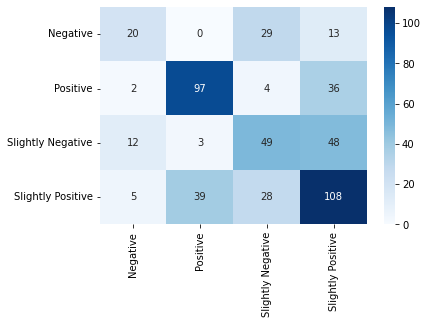

In [75]:
import seaborn as sns
sns.heatmap(cm_df, annot=True,cmap='Blues',fmt='g')

This confusion matrix looks so much better than our baseline logistic regression one from the previous notebook

## Conclusion
With an improvement of nearly 20% in our accuracy and much higher f1 scores all around it's safe to say the stacked model using Gradient Boosted Classification and Dense/Sparse Naive Bayes Probability is the best one